In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


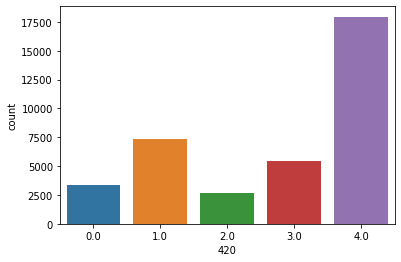

In [3]:
sns.countplot(df.iloc[:, -1])

In [10]:
def draw_pose(pose, ax=None):
    njoints = pose.shape[0]
    # 25 kpts
    connect_joints = (
        (0, 1), (1, 20), (2, 20), (3, 2), (4, 20), (5, 4), (6, 5), (7, 6), (8, 20), (9, 8), (10, 9), (11, 10),
        (12, 0),
        (13, 12), (14, 13), (15, 14), (16, 0), (17, 16), (18, 17), (19, 18), (21, 22), (20, 20), (22, 7), (23, 24),
        (24, 11)
    )
    # 14 kpts
    if njoints == 14:
        connect_joints = ((0, 13), (1, 13), (2, 1), (3, 2), (4, 13), (5, 4), (6, 5), (7, 13), 
                          (8, 7), (9, 8), (10, 13), (11, 10), (12, 11))
    plt.figure(figsize=(3, 6))
    plt.xticks(np.arange(0, 1920, step=100))
    plt.yticks(np.arange(0, 1080, step=100))
    for connect_joint in connect_joints:
        first_pt = pose[connect_joint[0]]
        second_pt = pose[connect_joint[1]]
        stack = np.vstack([first_pt, second_pt])
        if ax != None:
          ax.plot(stack[:, 0], stack[:, 1])
        else:
          plt.plot(stack[:, 0], stack[:, 1])
    plt.show()

In [8]:
ACTION_MAP_ID = {
    0: 'sit down', # sit down
    1: 'stand up', # stand up
    2: 'jump', # jump
    3: 'hand shake', # hand shake
    4: 'walk', # walk
}

walk


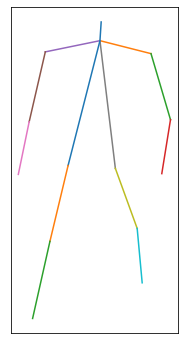

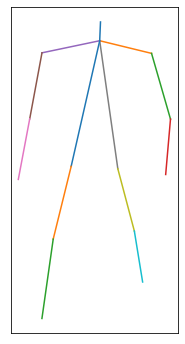

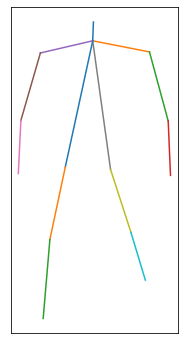

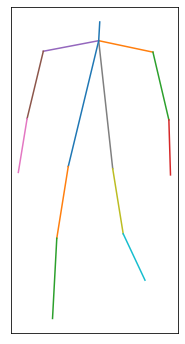

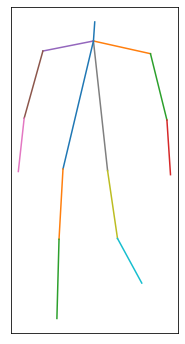

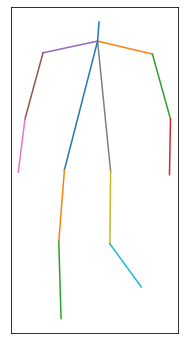

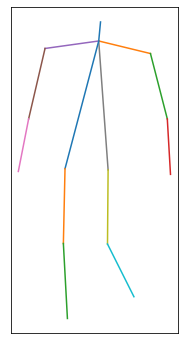

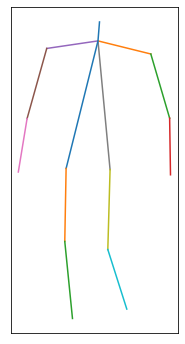

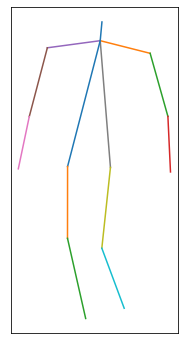

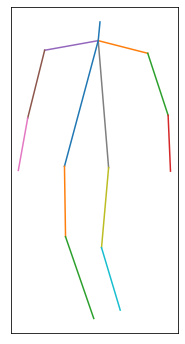

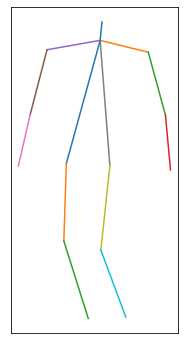

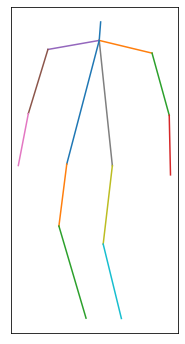

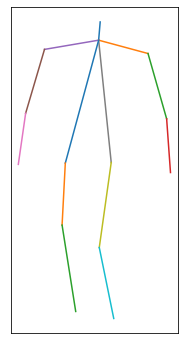

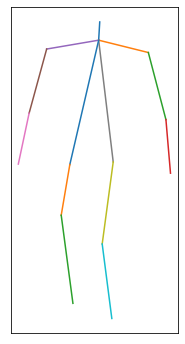

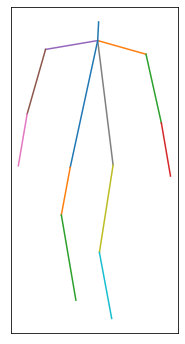

stand up


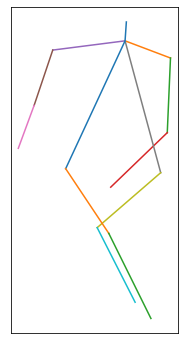

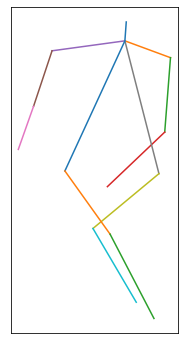

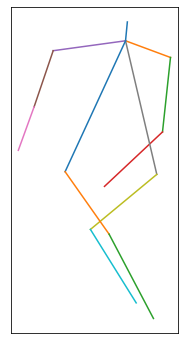

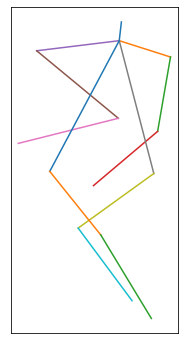

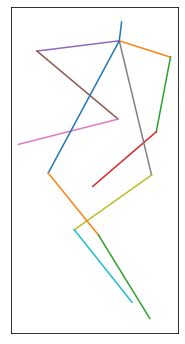

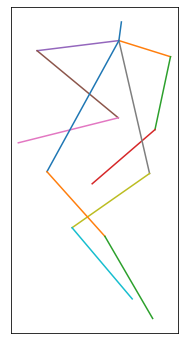

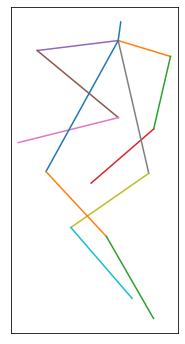

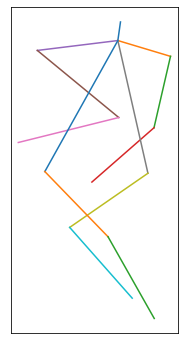

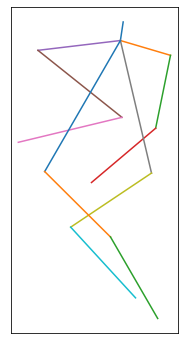

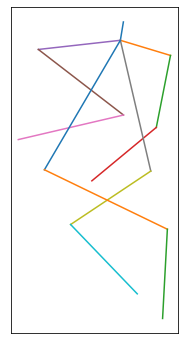

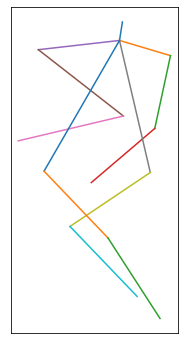

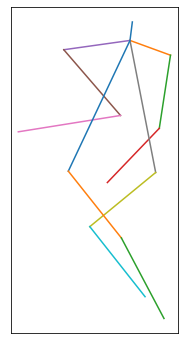

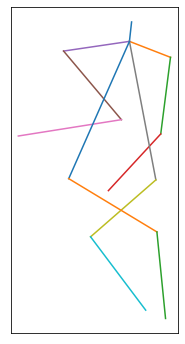

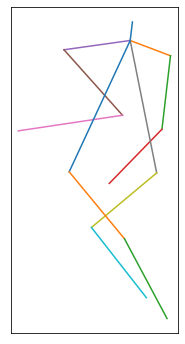

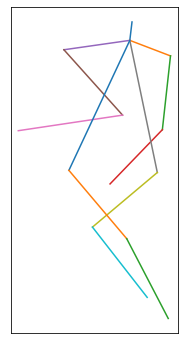

stand up


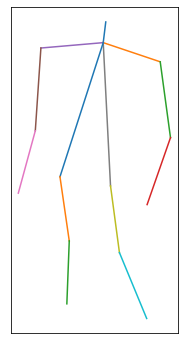

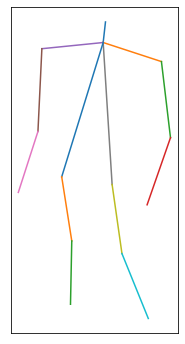

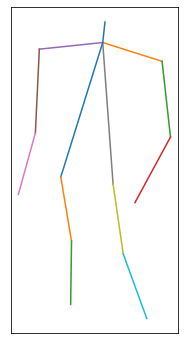

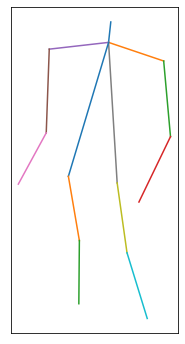

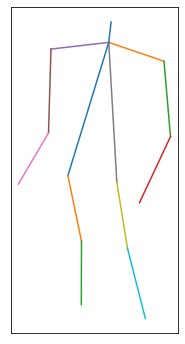

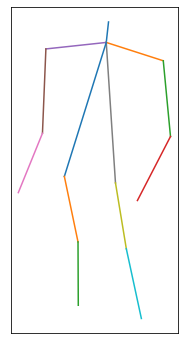

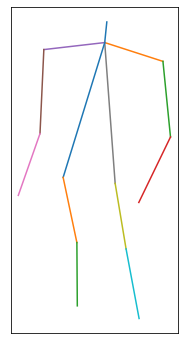

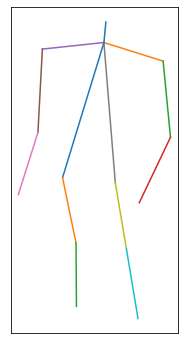

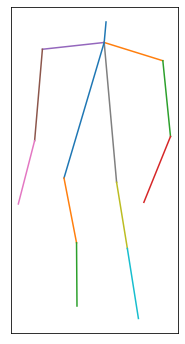

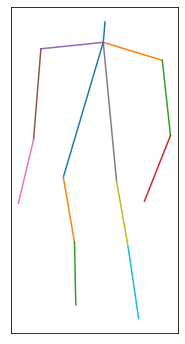

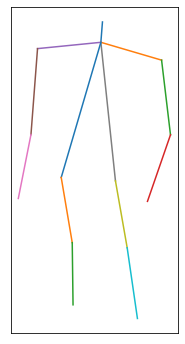

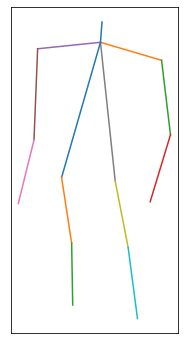

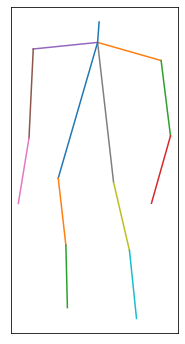

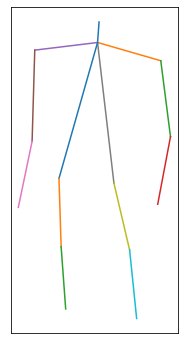

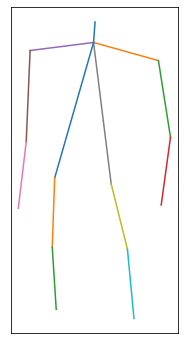

hand shake


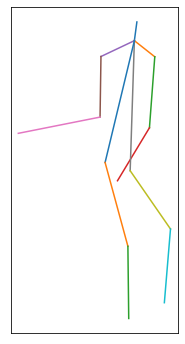

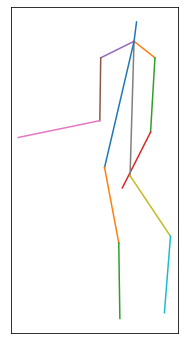

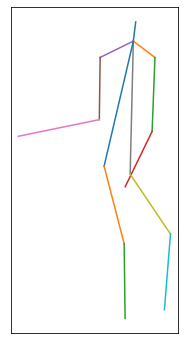

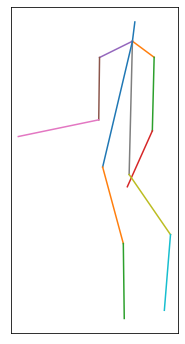

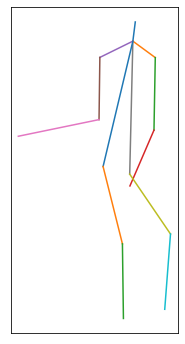

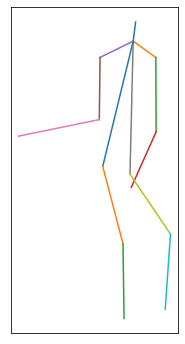

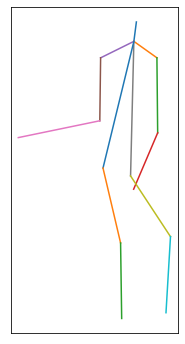

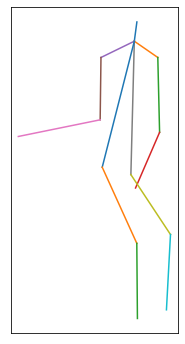

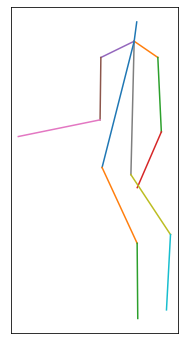

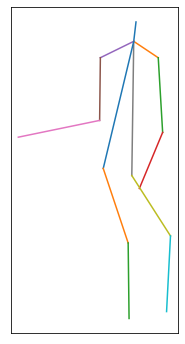

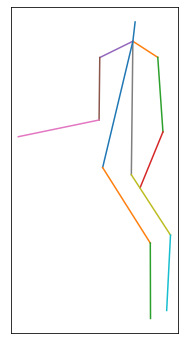

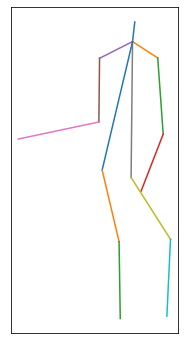

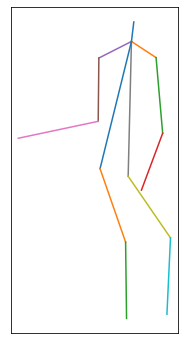

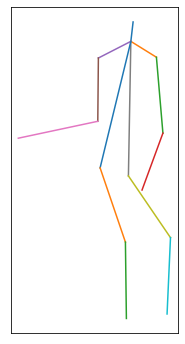

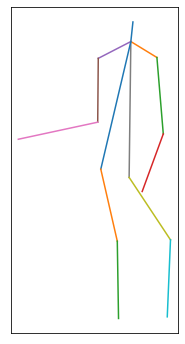

hand shake


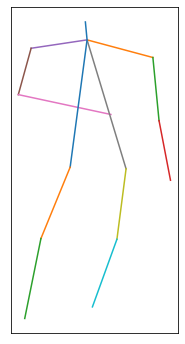

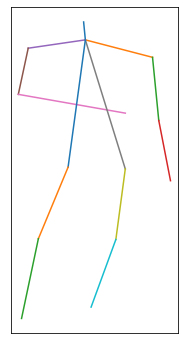

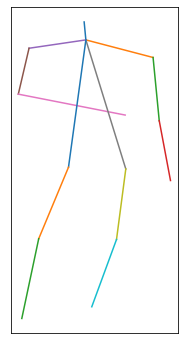

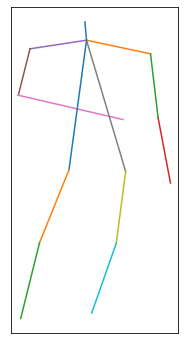

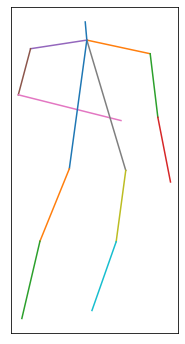

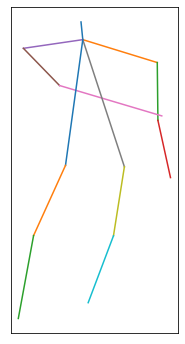

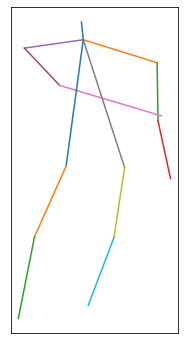

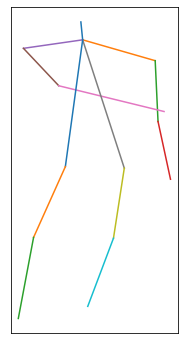

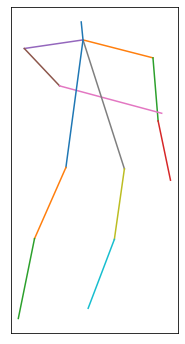

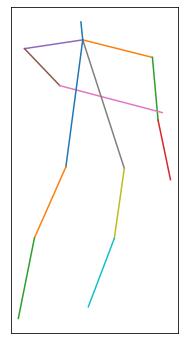

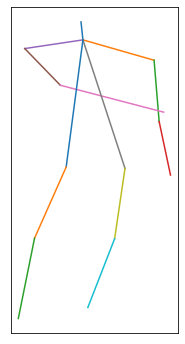

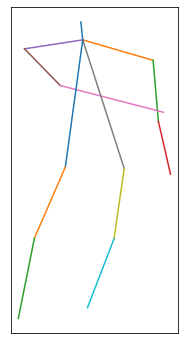

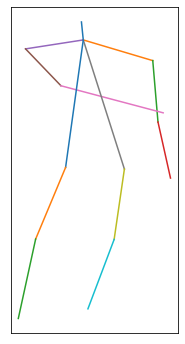

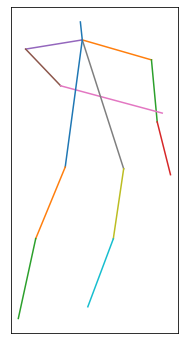

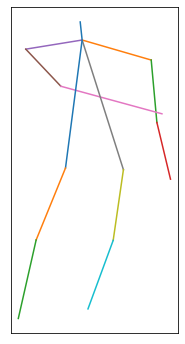

In [9]:
samples = df.sample(5)
X = samples.iloc[:, :-1].to_numpy()
y = samples.iloc[:, -1].to_numpy()

for idx, s in enumerate(X):
    print('=' * 10)
    print(ACTION_MAP_ID[y[idx]])
    poses = s.reshape(15, 14, 2)
    for pose in poses:
        draw_pose(pose)

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420
count,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,...,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000,36786.000000
mean,0.530656,0.632263,0.548119,0.600721,0.552517,0.540135,0.550588,0.487720,0.513536,0.600386,0.510583,0.540458,0.513492,0.489732,0.539170,0.475296,0.540529,0.398835,0.540987,0.319096,0.522965,0.475349,0.521617,0.398623,0.521741,0.319405,0.530733,0.612256,0.530294,0.632030,0.547757,0.600471,0.552208,0.539888,0.550312,0.487507,0.513166,0.600121,0.510243,0.540199,...,0.393479,0.537919,0.313393,0.519630,0.470704,0.518319,0.393194,0.518259,0.313710,0.527460,0.608755,0.527100,0.628627,0.544618,0.596783,0.549257,0.536288,0.547498,0.484153,0.509923,0.596417,0.507128,0.536776,0.510176,0.487133,0.535708,0.470242,0.537033,0.392999,0.537640,0.312816,0.519349,0.470282,0.518035,0.392742,0.517944,0.313253,0.527180,0.608429,2.738515
std,0.181932,0.138907,0.177770,0.143945,0.176874,0.155895,0.175988,0.170534,0.185162,0.143411,0.185236,0.155756,0.183053,0.170298,0.176723,0.172340,0.176135,0.193484,0.176115,0.219786,0.180178,0.172156,0.180228,0.193334,0.180135,0.219719,0.181399,0.141932,0.181635,0.138596,0.177495,0.143566,0.176591,0.155481,0.175741,0.170072,0.184851,0.143043,0.184898,0.155302,...,0.188355,0.173508,0.213585,0.177820,0.167676,0.177965,0.188143,0.177454,0.213465,0.179337,0.139212,0.179781,0.136361,0.176000,0.140750,0.175186,0.151635,0.174626,0.165746,0.182766,0.140263,0.182735,0.151523,0.180902,0.165550,0.174496,0.167494,0.174046,0.187922,0.173401,0.213054,0.177667,0.167339,0.177807,0.187719,0.177246,0.212931,0.179215,0.139052,1.456690
min,0.109732,0.073823,0.112182,0.044805,0.079220,0.057544,0.068364,0.086288,0.092402,0.118848,0.073889,0.110239,0.072653,0.085371,0.108183,0.081913,0.077832,0.057598,0.016847,0.000224,0.076261,0.106804,0.078910,0.054330,0.036449,0.000503,0.110161,0.081257,0.104004,0.078035,0.106646,0.047074,0.086090,0.070181,0.070904,0.088358,0.092696,0.128884,0.073556,0.102585,...,0.049567,0.007188,0.000678,0.092898,0.115348,0.057042,0.024832,0.003187,0.000789,0.106015,0.077563,0.105199,0.060348,0.093757,0.047073,0.090914,0.087409,0.056559,0.114432,0.082983,0.099288,0.078614,0.107929,0.079506,0.091009,0.101991,0.074023,0.064822,0.024676,0.003825,0.000101,0.083119,0.084350,0.067568,0.033387,0.005308,0.000954,0.107008,0.066666,0.000000
25%,0.431597,0.550794,0.450864,0.517360,0.456541,0.451478,0.455240,0.391835,0.413633,0.517338,0.411916,0.451647,0.415278,0.392311,0.443999,0.379123,0.445620,0.290838,0.446435,0.193990,0.426620,0.379775,0.425023,0.291377,0.426813,0.194822,0.432309,0.529935,0.431792,0.550534,0.450970,0.517350,0.456269,0.451405,0.455455,0.392001,0.413640,0.517064,0.411663,0.451862,...,0.288901,0.445578,0.192144,0.425827,0.377605,0.423956,0.289093,0.425880,0.192400,0.431167,0.527990,0.430281,0.549244,0.449

## Visualize data

In [8]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.model_selection import train_test_split

In [9]:
kpca = KernelPCA(n_components=3, kernel='rbf', eigen_solver='arpack', n_jobs=-1)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [11]:
X_transform = kpca.fit_transform(x_train)

In [13]:
red = y_train == 0
green = y_train == 1
blue = y_train == 2
yellow = y_train == 3
orange = y_train == 4

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

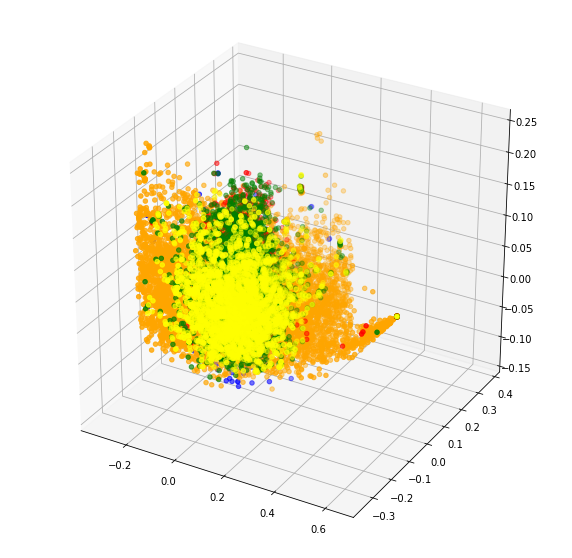

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transform[orange, 0], X_transform[orange, 1], X_transform[orange, 2], c='orange')
ax.scatter(X_transform[red, 0], X_transform[red, 1], X_transform[red, 2], c='red')
ax.scatter(X_transform[green, 0], X_transform[green, 1], X_transform[green, 2], c='green')
ax.scatter(X_transform[blue, 0], X_transform[blue, 1], X_transform[blue, 2], c='blue')
ax.scatter(X_transform[yellow, 0], X_transform[yellow, 1], X_transform[yellow, 2], c='yellow')
